<a href="https://colab.research.google.com/github/AnaJesusAJ/InteligenciaArtificial/blob/main/int6_exemplo_arvore_de_decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTI6 - Exemplo de Árvore de Decisão


---


**INT6 - Inteligência Artificial**

Tecnologia em Análise e Desenvolvimento de Sistemas - IFSP Hortolândia

Docentes/Material: Edgar Noda - Carlos R Santos Jr


---



# Árvore de Decisão - Resumo



* Tipo de Aprendizado **Supervisionado**
* Utilizado para problemas de Regressão ou **Classificação**
* Define regras de decisão baseado em um conjunto de dados
* White Box
* Árvores de decisão se baseiam em métricas como **entropia** e **ganho de informação** para posicionar as features de forma adequada.




#Dataset

O dataset **Pima Indians Diabetes Database** contém um conjunto de dados sobre pacientes acompanhados durante semanas ou meses.

Foram registrados informações relevantes como glicose, insulina e diversos itens relacionados ao estilo de vida.

Os dados são públicos e foram coletados para apresentação de experimentos em um Simpósio sobre Inteligência Artificial em Medicina.

Mais informações disponíveis em: https://archive.ics.uci.edu/ml/datasets/diabetes.

In [39]:
#Importações
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#Gráfico
from six import StringIO
import pydotplus
from IPython.display import Image

# Análise do Dataset

In [40]:
# Leitura do dataset
iris = load_iris() # Armazena os dados em um "Data Frame"

## Divisão dos dados - Treino/Teste

X: Parte do dataset que contém as características/features utilizadas para previsão.

y: Corresponde a coluna do dataset que queremos prever.

In [41]:
X = iris.data
y = iris.target

A função **train_test_split** separa os dados da seguinte forma:

**X_train e y_train:** São utilizados no treinamento do modelo, de forma que o algorítimo de ML consiga relacionar as features com sua respectiva saída (Preço).

**X_test e y_test:** O X_test é utilizado no teste do modelo já treinado. O modelo retorna o valor previsto que é comparado com o valor real (y_test) para avaliar sua eficiência.

**test_size:** Parâmetro que indica a porcentagem do dataset reservada para os testes

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

## Treino

In [104]:
# Cria um modelo vazio do tipo Árvore de Decisão
dtc_model = KNeighborsClassifier(n_neighbors=31)

validacao = cross_val_score(dtc_model, X_train, y_train, cv=9)
print("Validação cruzada:", validacao)
mvalidacao = validacao.mean()
print("Acurácia:", mvalidacao)

# Treina o modelo usando os dados de treino
dtc_model.fit(X_train, y_train)

# entropy: Defini o critério para escolha das features
# max_depth: Profundidade máxima da árvore

# REFs
# https://scikit-learn.org/stable/modules/tree.html
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

Validação cruzada: [0.91666667 0.91666667 0.91666667 1.         1.         0.83333333
 1.         0.81818182 1.        ]
Acurácia: 0.9335016835016836


KNeighborsClassifier(n_neighbors=31)

## Teste (Predição)

In [105]:
# Faz a predição com os dados de teste
y_pred = dtc_model.predict(X_test)

##Avaliação do Modelo

In [106]:
print("Acurácia: ", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

# PRECISÃO: DAS CLASSIFICAÇÕES QUE O MODELO FEZ PARA UMA DETERMINADA CLASSE, QUANTAS EFETIVAMENTE ERAM CORRETAS?
# RECALL: DOS POSSÍVEIS DATAPOINTS PERTECENTES A UMA DETERMINADA CLASSE, QUANTOS O MODELO CONSEGUIU CLASSIFICAR CORRETAMENTE?

Acurácia:  0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.90      0.90      0.90        10
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.96      0.96      0.96        45



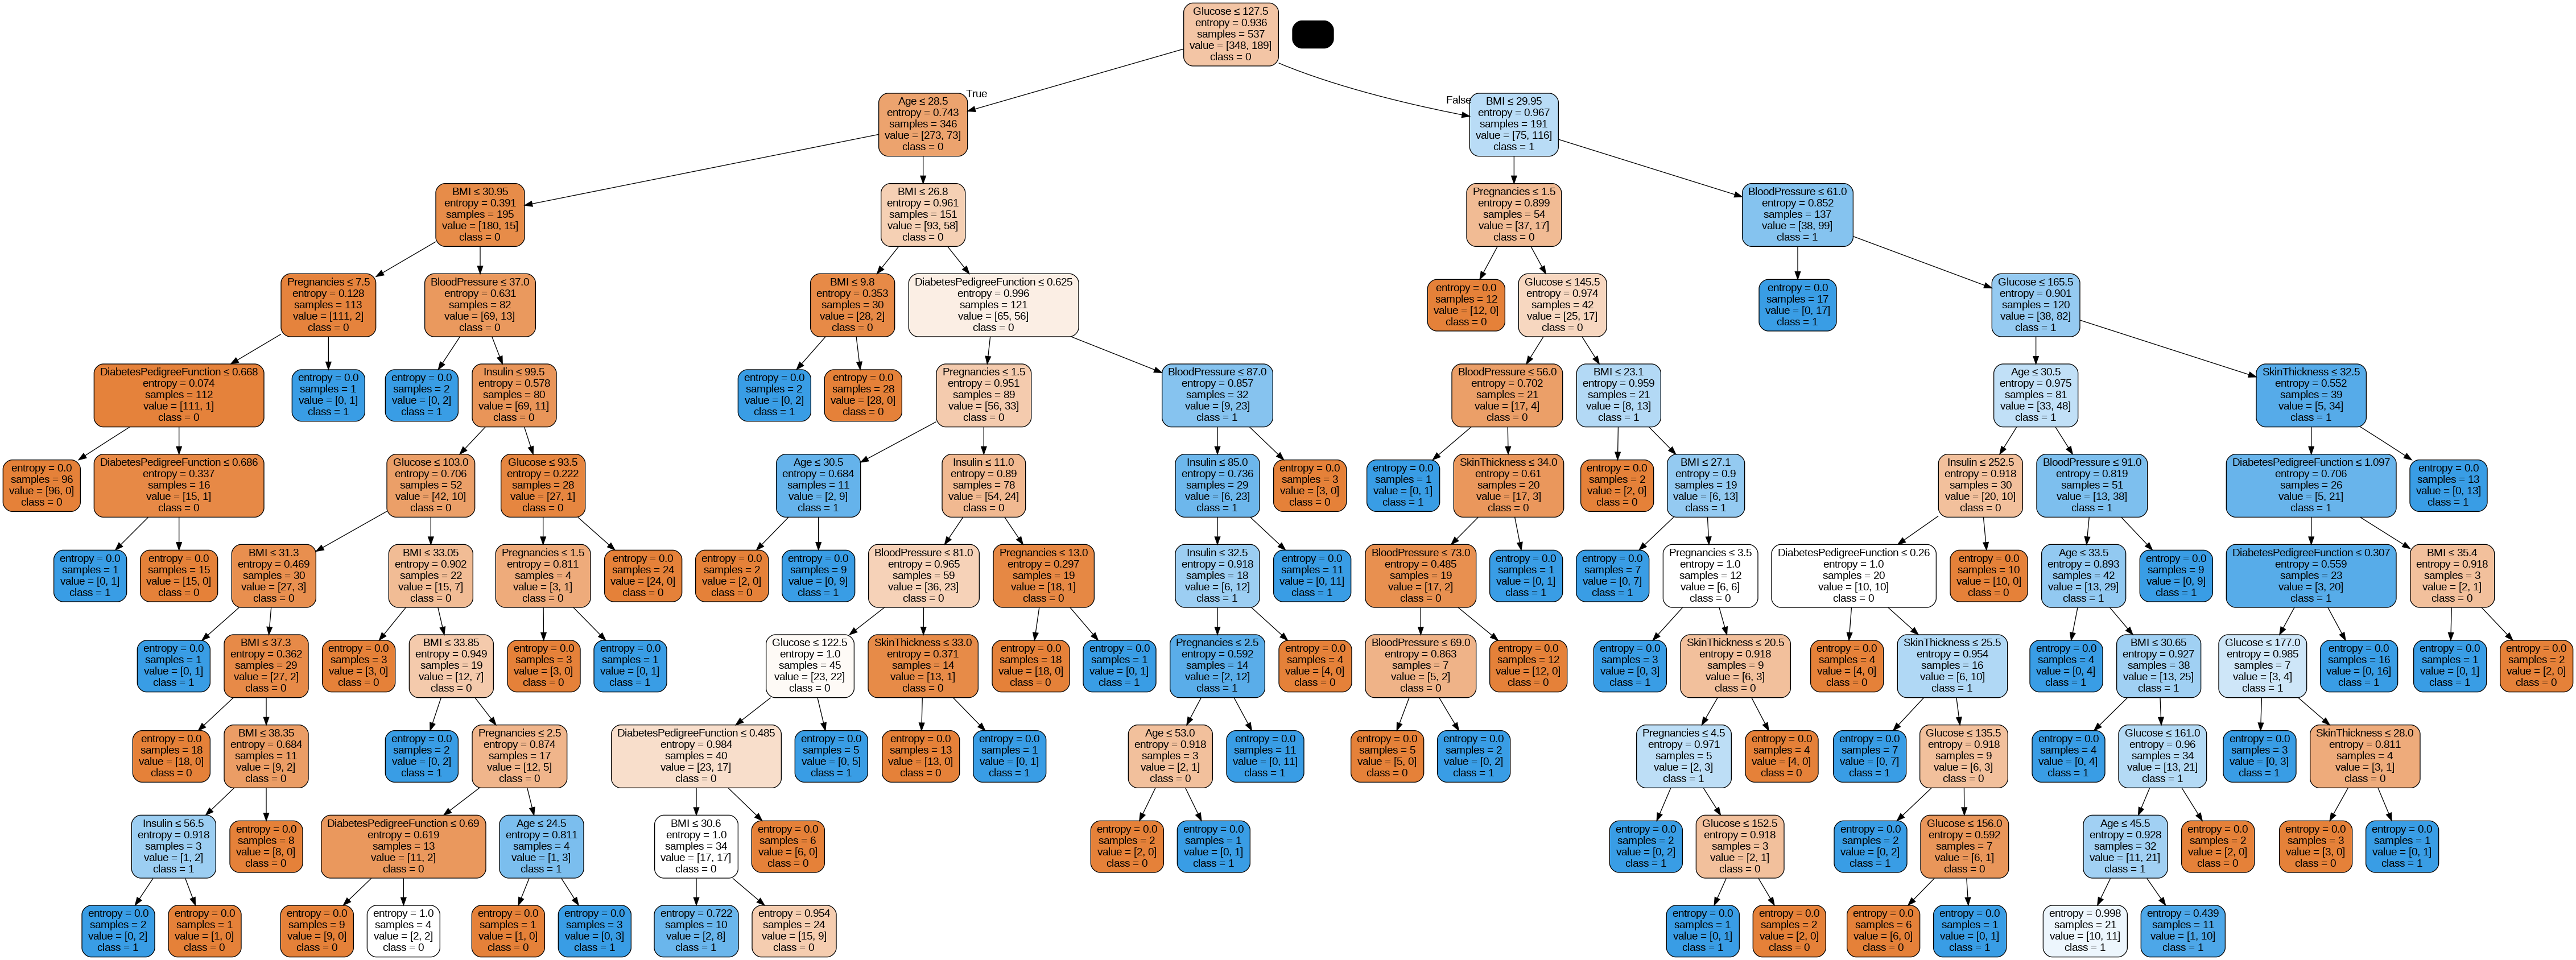

In [ ]:
#nome_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#       'BMI', 'DiabetesPedigreeFunction', 'Age']

nome_features = df.columns.drop('Outcome')

nome_classes = ['0','1']

# MONTAR A IMAGEM DA ÁRVORE
dot_data = StringIO()
export_graphviz(dtc_model, out_file=dot_data, filled=True, feature_names=nome_features, class_names=nome_classes, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
graph.write_png("arvore.png")
Image('arvore.png')